# Analysis of Video and Image Data for cropping and texture features
Author(s): Miguel Xochicale @mxochicale    
Contributor(s): 

## History
* 17th May 2022: Add prototype

## Summary


### How to run the notebook
1. Go to repository path: `$HOME/repositories/`
Open repo in pycharm and in the terminal type:
```
git checkout main # or the branch
git pull # to bring a local branch up-to-date with its remote version
```

2. Launch Notebook server. Go to you repository path: cd $HOME/repositories/ and type in the pycharm terminal:
```
conda activate *VE 
jupyter notebook --browser=firefox
```
which will open your web-browser.

## References 
1. https://stackoverflow.com/questions/45704999/how-to-convert-vector-wrapped-as-string-to-numpy-array-in-pandas-dataframe
2. https://github.com/YuxinZhaozyx/pytorch-VideoDataset/blob/master/datasets.py (Future work)
3. https://stackoverflow.com/questions/65446464/how-to-convert-a-video-in-numpy-array
4. https://matplotlib.org/stable/gallery/specialty_plots/mri_with_eeg.html#sphx-glr-gallery-specialty-plots-mri-with-eeg-py 
5. https://www.researchgate.net/publication/326881329_Medical_image_security_enhancement_using_two_dimensional_chaotic_mapping_optimized_by_self-adaptive_grey_wolf_algorithm 

    

## Setting imports and datasets paths

In [1]:
from rtt4ssa.utils.utils import video_to_tensor, compute_texture_array_and_plot
from rtt4ssa.utils.utils import data_frame_of_texture_analysis
from rtt4ssa.utils.utils import get_and_plot_imu_data_analysis

import os
import pandas as pd
import seaborn as sns
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.feature import graycomatrix, graycoprops
from typing import Tuple, List

HOME_PATH = os.path.expanduser(f'~')
USERNAME = os.path.split(HOME_PATH)[1]
REPOSITORY_PATH='repositories/rtt4ssa'


###########################
###SET DATA_PATH 
DATA_PATH='rtt4ssa/sensor_fusion'
FULL_REPO_DATA_PATH = HOME_PATH +'/' + REPOSITORY_PATH +'/' + DATA_PATH


###########################
### experiments_23-aug-2022
AVI_FILE = 'testNN.avi'
CSV_FILE = 'testNN.avi.csv'

FULL_PATH_AND_AVI_FILE = os.path.join(FULL_REPO_DATA_PATH , AVI_FILE)
FULL_PATH_AND_CSV_FILE = os.path.join(FULL_REPO_DATA_PATH , CSV_FILE)


## Printing Versions and paths
print(f'PyTorch Version: {torch.__version__}')
print(f'pandas Version: {pd.__version__}')
print(f'seaborn Version: {sns.__version__}')
print(f'numpy Version: {np.__version__}')
print(f'cv2 Version: {cv2.__version__}')
print(f'skimage Version: {skimage.__version__}')

print(f'FULL_REPO_DATA_PATH: {FULL_REPO_DATA_PATH}')
print(f'FULL_PATH_AND_CSV_FILE: {FULL_PATH_AND_CSV_FILE}')
print(f'FULL_PATH_AND_AVI_FILE: {FULL_PATH_AND_AVI_FILE}')




PyTorch Version: 2.0.0.post200
pandas Version: 2.0.3
seaborn Version: 0.12.2
numpy Version: 1.25.2
cv2 Version: 4.8.0
skimage Version: 0.21.0
FULL_REPO_DATA_PATH: /home/mxochicale/repositories/rtt4ssa/rtt4ssa/sensor_fusion
FULL_PATH_AND_CSV_FILE: /home/mxochicale/repositories/rtt4ssa/rtt4ssa/sensor_fusion/testNN.avi.csv
FULL_PATH_AND_AVI_FILE: /home/mxochicale/repositories/rtt4ssa/rtt4ssa/sensor_fusion/testNN.avi


# Reading video and plotting frames

In [2]:
start_frame_number = 000
end_frame_number = 2000

total_number_of_frames = end_frame_number - start_frame_number

In [3]:

video, frames_timestamp = video_to_tensor(FULL_PATH_AND_AVI_FILE, start_frame_number, end_frame_number)

# print(type(video))#<class 'numpy.ndarray'>
num_frames, height, width = video.shape
print(f'num_frames: {num_frames}')
print(f'height: {height}')
print(f'width: {width}')
#num_frames, height, width, channels = video.shape
# print(f'channels: {channels}')
# print(video[0].shape)#(480, 640, 3)



  
  
  VIDEO_FEATURES
    video_name=/home/mxochicale/repositories/rtt4ssa/rtt4ssa/sensor_fusion/testNN.avi
    Frame_height=480, frame_width=640 fps=120 nframes=2032 
  
  
num_frames: 1999
height: 480
width: 640


# Plotting texture analysis of all frames in the video

frame_i: 0, timestamp 00:00:0.000


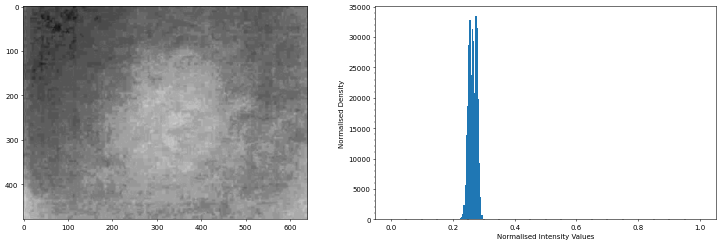

frame_i: 400, timestamp 00:03:333.333


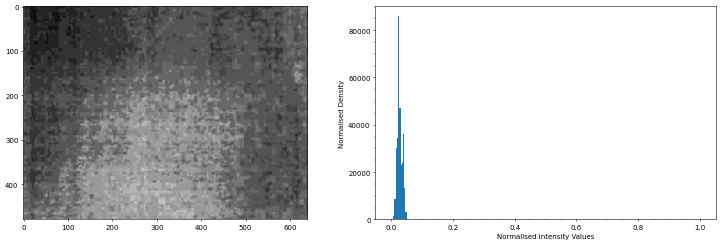

frame_i: 800, timestamp 00:06:666.667


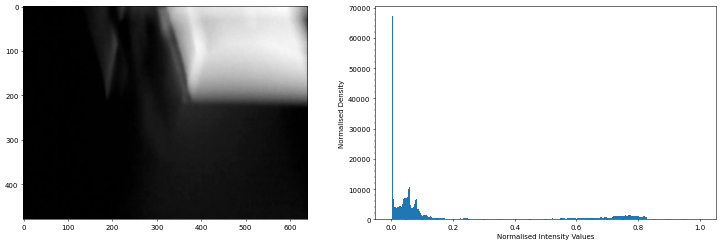

frame_i: 1200, timestamp 00:10:0.000


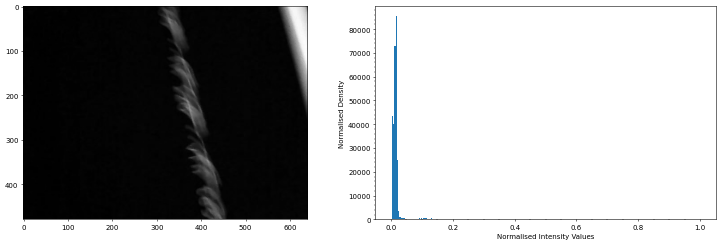

frame_i: 1600, timestamp 00:13:333.333


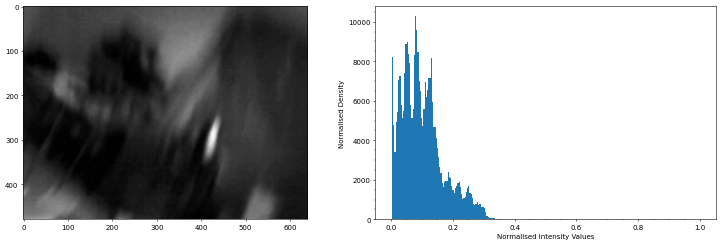

In [4]:
display_factor = 400    
texture_analysis_array = compute_texture_array_and_plot(video, frames_timestamp, display_factor)



# Plotting texture analysis of all frames in the video

In [5]:

df_texture_analysis = data_frame_of_texture_analysis(texture_analysis_array, start_frame_number, end_frame_number)


In [6]:
print(df_texture_analysis)


      frame_i  Contrast  Correlation  Dissimilarity    Energy  Homogeneity  \
0           0  0.255784     0.988611       0.201506  0.241826     0.904607   
1           1  0.248787     0.995091       0.188589  0.204624     0.911629   
2           2  0.248787     0.995091       0.188589  0.204624     0.911629   
3           3  0.248787     0.995091       0.188589  0.204624     0.911629   
4           4  0.248787     0.995091       0.188589  0.204624     0.911629   
...       ...       ...          ...            ...       ...          ...   
1994     1994  4.992351     0.996739       0.633627  0.360710     0.848962   
1995     1995  4.992351     0.996739       0.633627  0.360710     0.848962   
1996     1996  4.992351     0.996739       0.633627  0.360710     0.848962   
1997     1997  4.992351     0.996739       0.633627  0.360710     0.848962   
1998     1998  4.992351     0.996739       0.633627  0.360710     0.848962   

           ASM  Contrast_normalised  Correlation_normalised  \


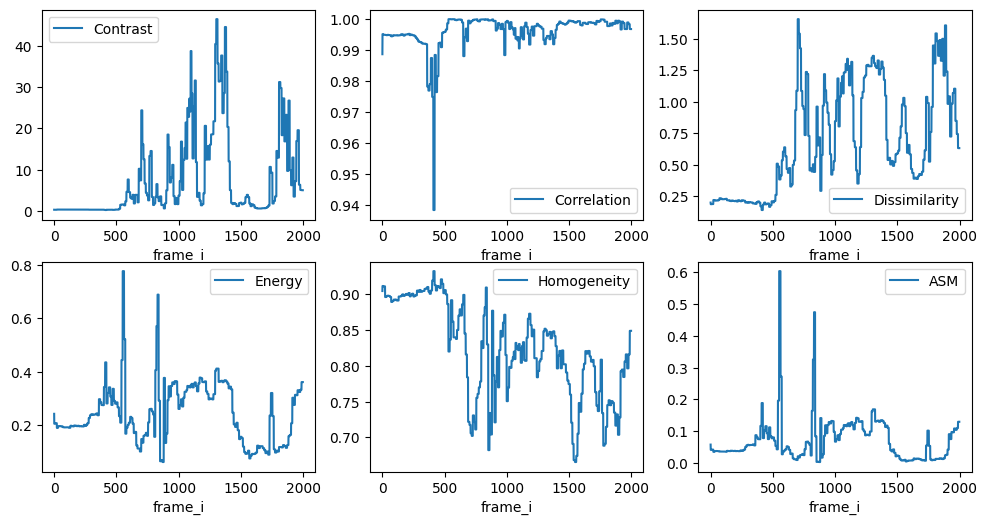

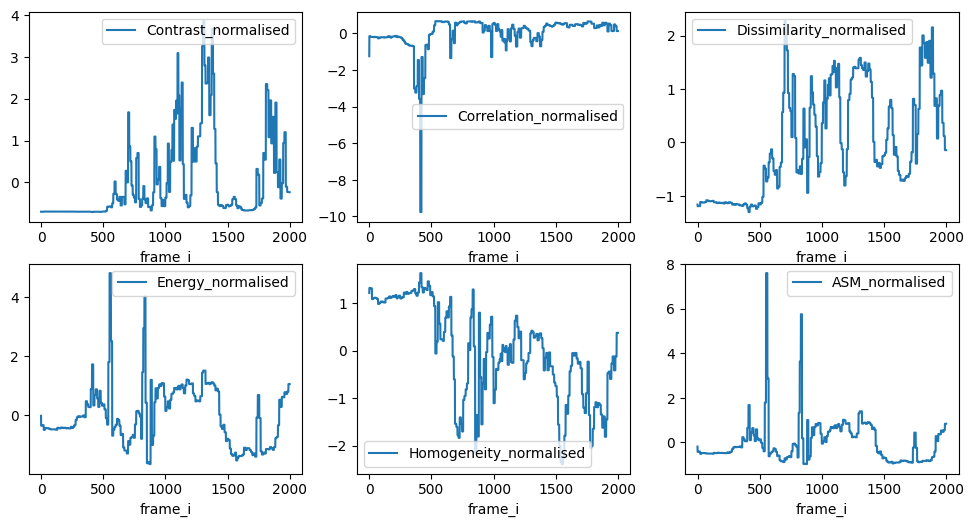

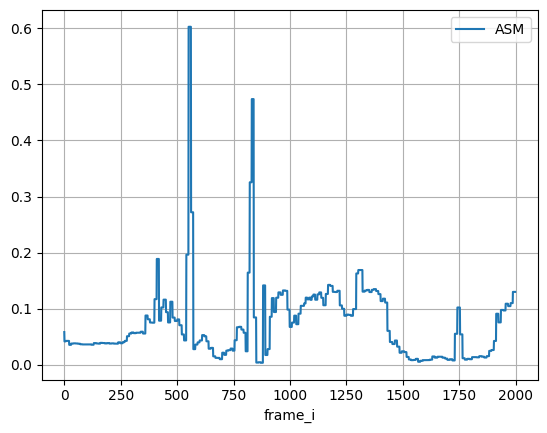

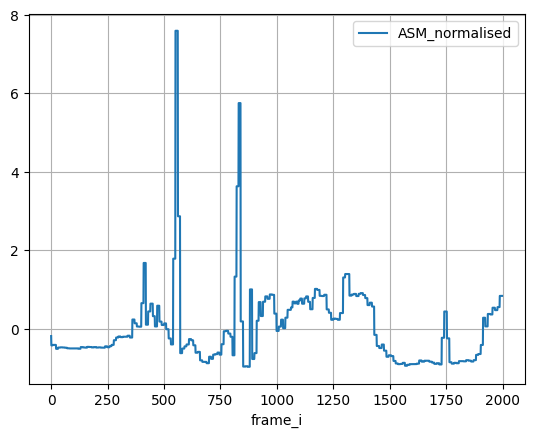

In [7]:
## Comment/uncomment any of the following lines to show however axis you would like to see in the plot
## TODO: https://seaborn.pydata.org/generated/seaborn.lineplot.html

### Ploting all texture features 
fig, axs = plt.subplots(2,3, figsize=(12, 6))

df_texture_analysis.plot(x='frame_i', y='Contrast', ax=axs[0,0] )
# axs[0,0].set_ylim((0,15)) 

df_texture_analysis.plot(x='frame_i', y='Correlation', ax=axs[0,1])
# # axs[0,2].set_ylim((0.997,0.999)) 

df_texture_analysis.plot(x='frame_i', y='Dissimilarity', ax=axs[0,2])
# axs[0,1].set_ylim((0.75,1.5)) 

df_texture_analysis.plot(x='frame_i', y='Energy', ax=axs[1,0])

df_texture_analysis.plot(x='frame_i', y='Homogeneity', ax=axs[1,1])
df_texture_analysis.plot(x='frame_i', y='ASM', ax=axs[1,2])

plt.show()



### Ploting all texture features 
fig, axs = plt.subplots(2,3, figsize=(12, 6))

df_texture_analysis.plot(x='frame_i', y='Contrast_normalised', ax=axs[0,0] )
# axs[0,0].set_ylim((0,15)) 

df_texture_analysis.plot(x='frame_i', y='Correlation_normalised', ax=axs[0,1])
# # axs[0,2].set_ylim((0.997,0.999)) 

df_texture_analysis.plot(x='frame_i', y='Dissimilarity_normalised', ax=axs[0,2])
# axs[0,1].set_ylim((0.75,1.5)) 

df_texture_analysis.plot(x='frame_i', y='Energy_normalised', ax=axs[1,0])

df_texture_analysis.plot(x='frame_i', y='Homogeneity_normalised', ax=axs[1,1])
df_texture_analysis.plot(x='frame_i', y='ASM_normalised', ax=axs[1,2])

plt.show()



### Ploting single texture feature
ax = plt.gca()
df_texture_analysis.plot(x='frame_i', y='ASM', ax=ax)
# plt.ylim((0.003,0.005))
plt.grid()
plt.show()


ax = plt.gca()
df_texture_analysis.plot(x='frame_i', y='ASM_normalised', ax=ax)
plt.grid()
plt.show()




## Reading and ploting csv files

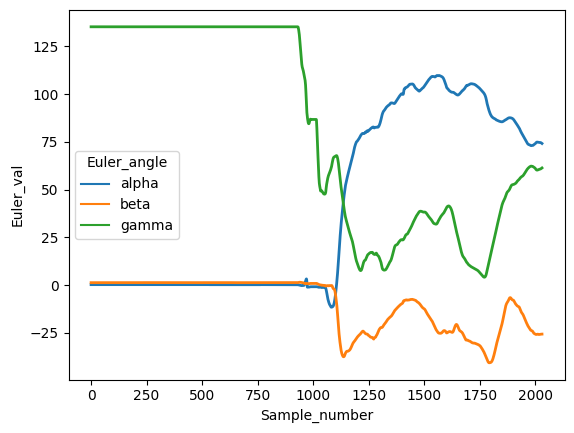

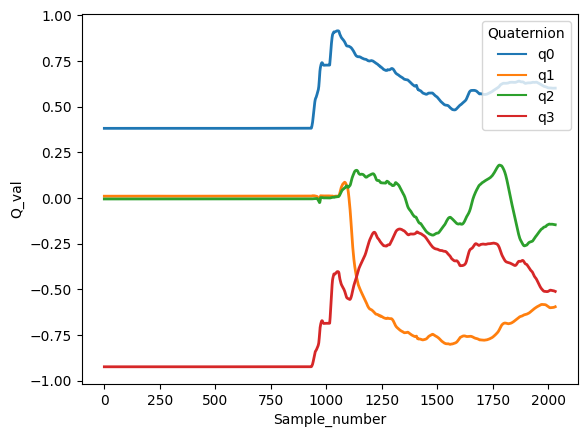

In [8]:
    df, ndf, nqdf = get_and_plot_imu_data_analysis(FULL_PATH_AND_CSV_FILE)


In [9]:
ndf

,Sample_number,Euler_angle,Euler_val
0,0,alpha,0.211303
1,1,alpha,0.211362
2,2,alpha,0.211789
3,3,alpha,0.213925
4,4,alpha,0.213979
...,...,...,...
6091,2027,gamma,60.964680
6092,2028,gamma,61.047443
6093,2029,gamma,61.133347
6094,2030,gamma,61.223415


In [10]:
nqdf

,Sample_number,Quaternion,Q_val
0,0,q0,0.380813
1,1,q0,0.380816
2,2,q0,0.380814
3,3,q0,0.380815
4,4,q0,0.380819
...,...,...,...
8123,2027,q3,-0.509810
8124,2028,q3,-0.510307
8125,2029,q3,-0.510829
8126,2030,q3,-0.511390
